Tarık Yeşiltepe Id:17050111053 <br>
Selen Çiğdem Id:18050111006

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Model

In [2]:
from tensorflow.keras.datasets import mnist
#train test split

(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
#shapes are checked via print()
print("X_train:",X_train.shape)
print("X_valid:",X_test.shape)
print("-------------------")
print("y_train:",y_train.shape)
print("y_valid:",y_valid.shape)

X_train: (55000, 28, 28)
X_valid: (10000, 28, 28)
-------------------
y_train: (55000,)
y_valid: (5000,)


## SEQUENTIAL PART

### MODEL-1 

In [5]:
model1 = Sequential()

In [6]:
model1.add(Flatten(input_shape=[28, 28]))
model1.add(Dense(10, activation="softmax"))

In [7]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


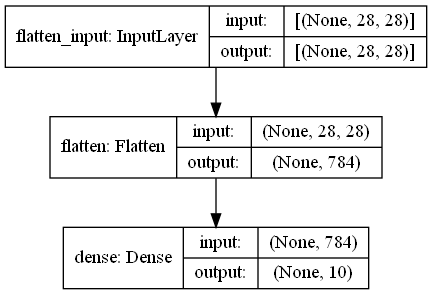

In [8]:
from tensorflow.keras.utils import plot_model

plot_model(model1, to_file='model1_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
model1.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [10]:
h = model1.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 1.1858 - accuracy: 0.7016 - val_loss: 0.4975 - val_accuracy: 0.8758
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4926 - accuracy: 0.8743 - val_loss: 0.4107 - val_accuracy: 0.8920
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4245 - accuracy: 0.8859 - val_loss: 0.3735 - val_accuracy: 0.9020
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.8934 - val_loss: 0.3525 - val_accuracy: 0.9048
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3674 - accuracy: 0.8986 - val_loss: 0.3389 - val_accuracy: 0.9084
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3594 - accuracy: 0.9000 - val_loss: 0.3296 - val_accuracy: 0.9090
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3480 - accuracy: 0.9025 - val_loss: 0.3211 - val_accuracy:

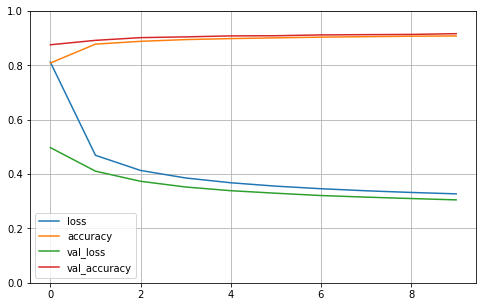

In [11]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

### MODEL-2

In [12]:
model2 = Sequential()

In [13]:
model2.add(Flatten(input_shape=[28, 28]))
model2.add(Dense(16, activation="sigmoid"))
model2.add(Dense(10, activation="softmax"))

In [14]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


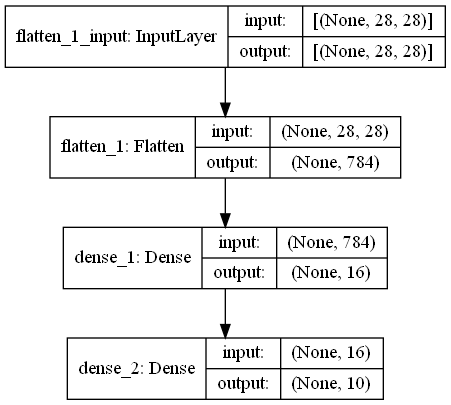

In [15]:
plot_model(model2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [16]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [17]:
h = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 2.0797 - accuracy: 0.3827 - val_loss: 1.3762 - val_accuracy: 0.7432
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 1.2451 - accuracy: 0.7630 - val_loss: 0.9249 - val_accuracy: 0.8106
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.8776 - accuracy: 0.8185 - val_loss: 0.7123 - val_accuracy: 0.8488
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.6935 - accuracy: 0.8532 - val_loss: 0.5905 - val_accuracy: 0.8732
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5829 - accuracy: 0.8716 - val_loss: 0.5139 - val_accuracy: 0.8846
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8805 - val_loss: 0.4621 - val_accuracy: 0.8930
Epoch 7/20
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4730 - accuracy: 0.8859 - val_loss: 0.4253 - val_accuracy:

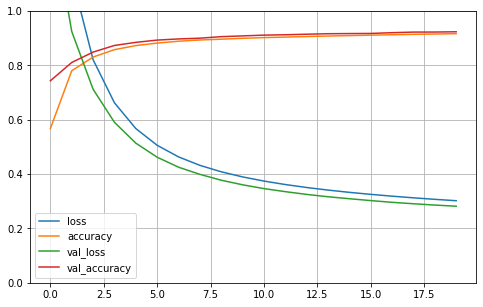

In [18]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

### MODEL-3

In [19]:
model3 = Sequential()

In [20]:
model3.add(Flatten(input_shape=[28, 28]))
model3.add(Dense(256, activation="relu"))
model3.add(Dense(128, activation="relu"))
model3.add(Dense(96, activation="relu"))
model3.add(Dense(64, activation="relu"))
model3.add(Dense(32, activation="relu"))
model3.add(Dense(16, activation="relu"))
model3.add(Dense(10, activation="softmax"))

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)               

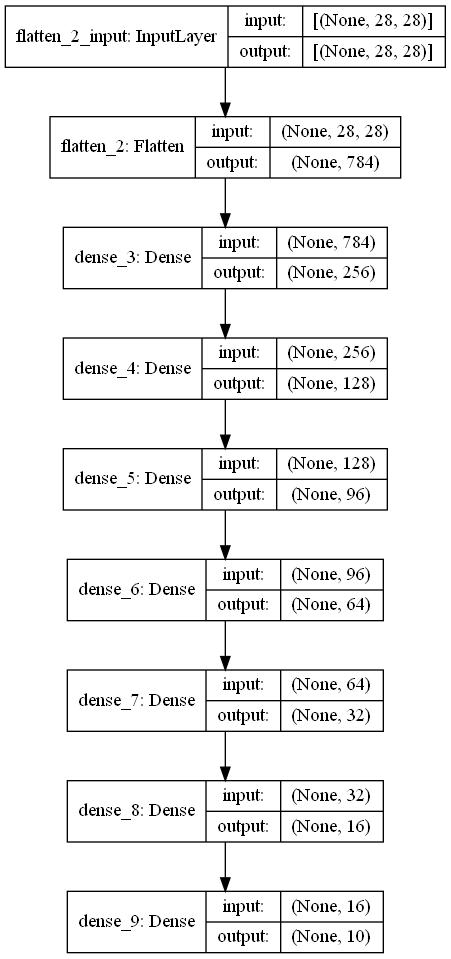

In [22]:
plot_model(model3, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)

In [23]:
model3.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
h = model3.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 13s 7ms/step - loss: 1.4150 - accuracy: 0.5294 - val_loss: 0.2992 - val_accuracy: 0.9144
Epoch 2/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2654 - accuracy: 0.9226 - val_loss: 0.1652 - val_accuracy: 0.9536
Epoch 3/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1693 - accuracy: 0.9494 - val_loss: 0.1369 - val_accuracy: 0.9594
Epoch 4/20
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1248 - accuracy: 0.9627 - val_loss: 0.1265 - val_accuracy: 0.9614
Epoch 5/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0988 - accuracy: 0.9715 - val_loss: 0.1077 - val_accuracy: 0.9680
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0827 - accuracy: 0.9751 - val_loss: 0.1032 - val_accuracy: 0.9682
Epoch 7/20
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0702 - accuracy: 0.9789 - val_loss: 0.0913 - val_accurac

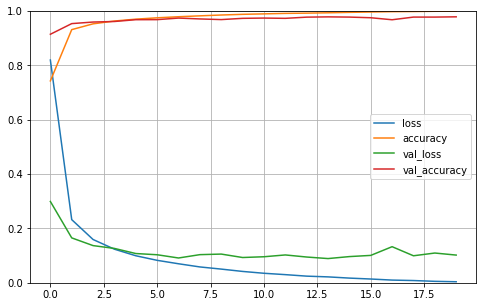

In [25]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## FUNCTIONAL PART

In [26]:
input_A = Input(shape=[28, 28])
flatten = Flatten(input_shape=[28, 28])(input_A)
hidden1 = Dense(256, activation="relu")(flatten)
hidden2 = Dense(128, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)
hidden4 = Dense(32, activation='relu')(hidden3)

#blue box
hidden1_B = Dense(256, activation="sigmoid")(flatten)
hidden2_B = Dense(128, activation="sigmoid")(hidden1_B)
hidden3_B = Dense(32, activation="sigmoid")(hidden2_B)

concat = Concatenate()([hidden4, hidden3_B])
hidden5 = Dense(24, activation="relu")(concat)
hidden6 = Dense(16, activation="relu")(hidden5)
output = Dense(10, activation="softmax")(hidden6)

model4 = Model(inputs=[input_A], outputs=[output])

In [27]:
model4.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 784)          0           input_1[0][0]                    
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 256)          200960      flatten_3[0][0]                  
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 128)          32896       dense_10[0][0]                   
______________________________________________________________________________________________

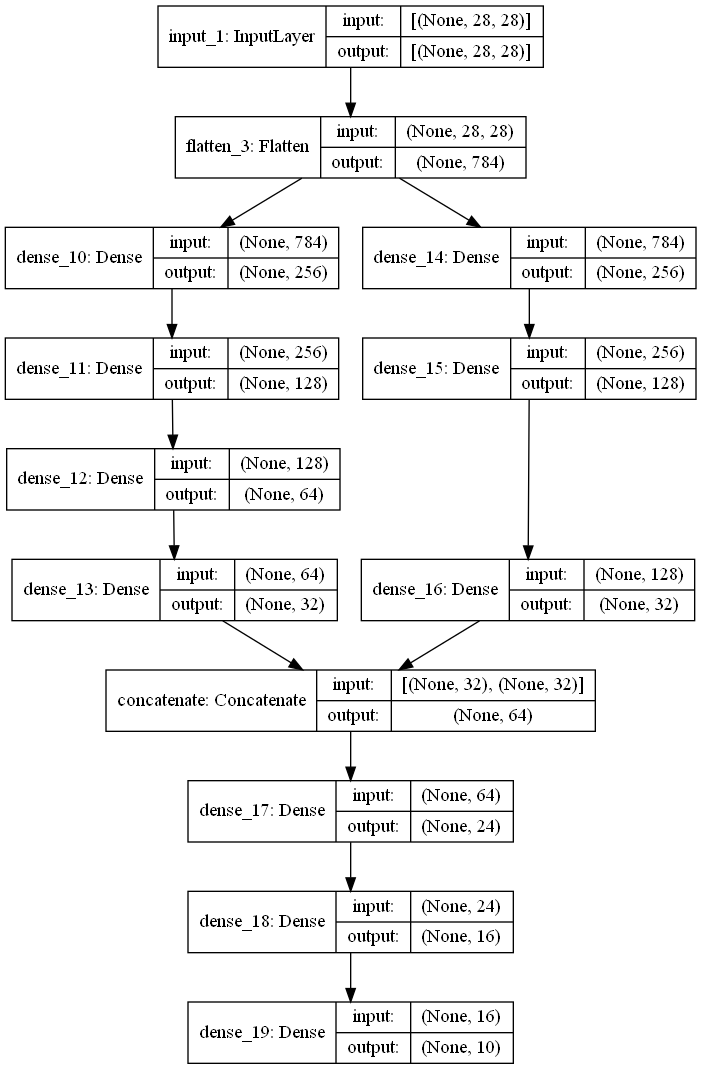

In [32]:
plot_model(model4, to_file='model4_plot.png', show_shapes=True, show_layer_names=True)

In [29]:
model4.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [30]:
h = model4.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 12s 6ms/step - loss: 1.8593 - accuracy: 0.3242 - val_loss: 0.4338 - val_accuracy: 0.8708
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3582 - accuracy: 0.8942 - val_loss: 0.2136 - val_accuracy: 0.9388
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2167 - accuracy: 0.9372 - val_loss: 0.1581 - val_accuracy: 0.9518
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1564 - accuracy: 0.9548 - val_loss: 0.1310 - val_accuracy: 0.9632
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1223 - accuracy: 0.9636 - val_loss: 0.1175 - val_accuracy: 0.9664
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1036 - accuracy: 0.9706 - val_loss: 0.1020 - val_accuracy: 0.9712
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0815 - accuracy: 0.9769 - val_loss: 0.0920 - val_acc

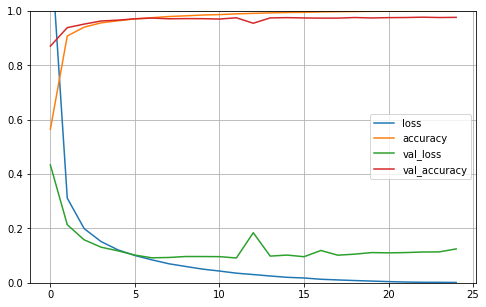

In [31]:
pd.DataFrame(h.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()